# Deep Learning for Image Classification


**Build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Downloading the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


## Visualizing the Data

In [2]:
import matplotlib.pyplot as plt
import cv2

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

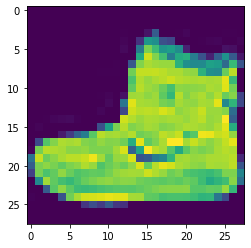

In [7]:
plt.imshow(x_train[0])

## Preprocessing the Data

**Normalizing the X train and X test data by dividing by the max value of the image arrays.**

In [11]:
max=x_train[0].max()

In [12]:
x_train = x_train/max

In [13]:
x_test = x_test/max

** Reshaping the X arrays to include a 4 dimension of the single channel.**

In [20]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_test.shape

(10000, 28, 28)

### Converting the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.

In [22]:
from keras.utils import to_categorical

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_cat_train = to_categorical(y_train)

In [25]:
y_cat_test = to_categorical(y_test)

## Building the Model

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [29]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [31]:
model.fit(x_train,y_cat_train,epochs=10)

W0415 02:53:33.642090 16372 module_wrapper.py:139] From C:\ProgramData\Anaconda3\new\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/10
60000/60000 [==============================] - 58s 966us/step - loss: 0.3996 - accuracy: 0.8580
Epoch 2/10
60000/60000 [==============================] - 53s 889us/step - loss: 0.2760 - accuracy: 0.9015
Epoch 3/10
60000/60000 [==============================] - 57s 944us/step - loss: 0.2365 - accuracy: 0.9153
Epoch 4/10
60000/60000 [==============================] - 57s 956us/step - loss: 0.2144 - accuracy: 0.9236
Epoch 5/10
60000/60000 [==============================] - 58s 972us/step - loss: 0.1952 - accuracy: 0.9304
Epoch 6/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1787 - accuracy: 0.9370
Epoch 7/10
60000/60000 [==============================] - 58s 975us/step - loss: 0.1672 - accuracy: 0.9407
Epoch 8/10
60000/60000 [==============================] - 58s 973us/step - loss: 0.1564 - accuracy: 0.9452
Epoch 9/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1480 - accuracy: 0.9479
Epoch 10/10
60000/60000 [================

### Evaluating the Model

In [32]:
model.metrics_names

['loss', 'accuracy']

In [34]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 4s 354us/step


[0.32229243838191035, 0.9088000059127808]

In [35]:
from sklearn.metrics import classification_report

In [36]:
predictions = model.predict_classes(x_test)

In [37]:
y_cat_test.shape

(10000, 10)

In [38]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [39]:
predictions[0]

9

In [40]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.82      0.89      0.86      1000
           3       0.92      0.91      0.91      1000
           4       0.84      0.87      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.80      0.68      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

